https://www.kaggle.com/datasets/mikoajfish99/lions-or-cheetahs-image-classification

In [1]:
import os
os.environ['HF_TOKEN'] ="your_hugging_face_token_here"


In [9]:
!pip install datasets
!pip install opendatasets
!pip install kaggle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00


In [5]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mikoajfish99/lions-or-cheetahs-image-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tuchsanai
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mikoajfish99/lions-or-cheetahs-image-classification


100%|██████████| 71.3M/71.3M [00:01<00:00, 58.5MB/s]


In [13]:
from datasets import load_dataset

raw_dataset = load_dataset("imagefolder", data_dir="./lions-or-cheetahs-image-classification")

raw_dataset

Resolving data files:   0%|          | 0/200 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 200
    })
})

# Train Test split

In [14]:
dataset = raw_dataset['train'].train_test_split(test_size=0.2)
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 160
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 40
    })
})

In [15]:
dataset['train'][0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768>,
 'label': 1}

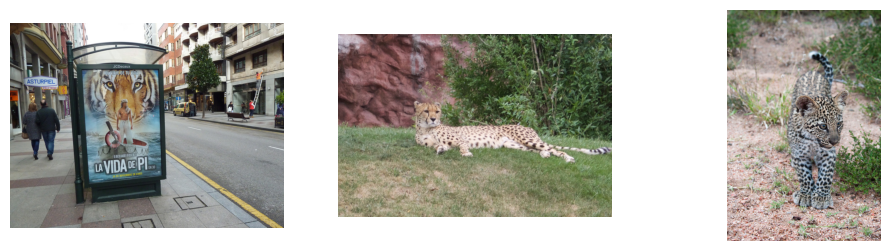

In [16]:
import matplotlib.pyplot as plt

def show_images(dataset, num_images=3):
    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        image = dataset[i]['image']
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# Show some images from the training dataset
show_images(dataset['train'])

# Download the model from Hugging Face

In [7]:
import torch
import torch.nn as nn
from torchvision.models import resnet18
from huggingface_hub import PyTorchModelHubMixin

class CustomModel(nn.Module, PyTorchModelHubMixin):
    def __init__(self, config: dict):
        super().__init__()
        self.resnet = resnet18(pretrained=True)
        num_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_features, config["num_classes"])

    def forward(self, x):
        return self.resnet(x)

checkpoint = "Tuch/custom-resnet18-model"
# download from hub
loaded_model1 = CustomModel.from_pretrained(checkpoint)
loaded_model1

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


CustomModel(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_